# Определение перспективного тарифа

**Описание**

Компания «Мегалайн» — федерального оператора сотовой связи.<br> Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br>
Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<font size=+2>Описание тарифов</font><br>
**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
  -  Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
  -  Сообщение — 3 рубля.
  -  1 Гб интернет-трафика — 200 рублей.<br>
  
**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
  -  Минута разговора — 1 рубль;
  -  Сообщение — 1 рубль;
  -  1 Гб интернет-трафика: 150 рублей.

<font size=+2>Описание данных</font><br>
`Таблица users` — информация о пользователях:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана<br>

`Таблица calls` — информация о звонках:
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах, округляются в большую сторону
- user_id — идентификатор пользователя, сделавшего звонок<br>

`Таблица messages` — информация о сообщениях:
- id — уникальный номер звонка
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение<br>

`Таблица internet` — информация об интернет-сессиях:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя<br>

`Таблица tariffs` — информация о тарифах:
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)




## Изучение данных

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as st

plt.style.use('dark_background')


In [2]:
calls = pd.read_csv('/datasets/calls.csv')
sessions = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Посмотрим на каждый датасет

#### Звонки

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [6]:
calls.isna().mean()

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

In [7]:
calls.duplicated().sum()

0

Пропусков и дублей в датасете нет <br>Нулевые значения в продолжительности - пропущенные звонки<br>Продолжительность звонков необходимо округлить и изменить тип данных, так как данные хранятся в целых значениях минут, а у нас встречаются дробные значения

#### Сообщения

In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [11]:
messages.isna().mean()

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

In [12]:
messages.duplicated().sum()

0

Пропусков и дублей нет.<br>Необходимо изменить тип данных в `message_date`

#### Интернет-сессии

In [13]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [15]:
sessions.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [16]:
sessions.isna().mean()

Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

In [17]:
sessions.duplicated().sum()

0

Пропусков и дублей нет.<br>Необходимо изменить тип данных в `session_date`<br>Присутствуют клиенты, который не пользуются интернетом<br>`Unnamed: 0` дублирует значение индекса, сразу удалим его

In [18]:
sessions = sessions.drop(columns='Unnamed: 0')
sessions.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

#### Тарифы

In [19]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [20]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [22]:
tariffs.isna().mean()

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64

In [23]:
tariffs.duplicated().sum()

0

Пропусков и дублей нет.<br>Необходимо изменить тип данных в `session_date`<br>Присутствуют клиенты, который не пользуются интернетом<br>`Unnamed: 0` дублирует значение индекса

#### Пользователи

In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [25]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [26]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [27]:
users['user_id'].nunique()

500

In [28]:
users.isna().mean()

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

In [29]:
users.duplicated().sum()

0

Пропуски в `churn_date` говорят о том, что клиент пользуется тарифом на момент выгрузки данных, так что пропусков и дублей нет.<br>Необходимо изменить тип данных в `churn_date` и `reg_date`<br> На момент выгрузки 462 активных клиента

#### Выводы

Необходимо изменить тип данных для столбцов с датами, округлить продолжительность звонков и изменить тип данных

### Предобработка данных

Изменим тип данных для:

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`


In [30]:

users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

calls['call_date'] = pd.to_datetime(calls['call_date'])

messages['message_date'] = pd.to_datetime(messages['message_date'])
sessions['session_date'] = pd.to_datetime(sessions['session_date'])

Так как оператор округляет продолжительность звонков в большую сторону и хранит данные в целых значениях - окргулим значения и изменим тип данных

In [31]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')

### Расчет данных, необходимых для анализа

Для каждого пользователя посчитаем :
-   количество сделанных звонков и израсходованных минут разговора по месяцам
-   количество отправленных сообщений по месяцам
-   объем израсходованного интернет-трафика по месяцам

В каждый датасет добавим столбец с месяцем

In [32]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
sessions['month'] = sessions['session_date'].dt.month

Посчитайте количество сделанных звонков и израсходованных минут каждым пользователем по месяцам.

In [33]:
calls_per_month = calls.groupby(['user_id', 'month'])['duration']\
                  .agg(['count','sum']).rename(columns={'count':'cnt_calls','sum':'duration'})
calls_per_month

cnt_calls  duration
user_id month                     
1000    5             22       159
        6             43       172
        7             47       340
        8             52       408
        9             58       466
...                  ...       ...
1498    10            41       247
1499    9              9        70
        10            68       449
        11            74       612
        12            69       492

[3174 rows x 2 columns]

Посчитайте количество отправленных сообщений каждым пользователем по месяцам.

In [34]:
messages_per_month = messages.groupby(['user_id','month'])\
                             .agg(messages=('message_date','count'))
messages_per_month.head()

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя 

In [35]:
sessions_per_month = sessions.groupby(['user_id','month']).agg(mb_used=('mb_used','sum'))
sessions_per_month.head()

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

### Анализ данных и подсчёт выручки

#### Расчет выручки

Объединим таблицы в общую сводную

In [36]:
pv_table= calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

pv_table.head()

,user_id,month,cnt_calls,duration,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим сводную таблицу на пропуски

In [37]:
pv_table.isna().sum()

user_id          0
month            0
cnt_calls       40
duration        40
messages       497
mb_used         11
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Пропущенные значения в полях, связанных с использованием услуг в рамках тарифа заменим на 0<br>
Если там нет значений, значит,скорее всего,  пользователь не пользовался этими услугами в данном месяце

In [38]:
pv_table['cnt_calls'] = pv_table['cnt_calls'].fillna(0)
pv_table['duration'] = pv_table['duration'].fillna(0)
pv_table['messages'] = pv_table['messages'].fillna(0)
pv_table['mb_used'] = pv_table['mb_used'].fillna(0)

Добавим информацию о тарифах

In [39]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
pv_table = pv_table.merge(tariffs, on='tariff')

Расчитаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф

Если пользователь не превышал лимитов тарифа, то заменим значения расчетов на 0

In [40]:
pv_table['duration_over'] = pv_table['duration'] - pv_table['minutes_included']
pv_table['messages_over'] = pv_table['messages'] - pv_table['messages_included']
pv_table['mb_over'] = pv_table['mb_used'] - pv_table['mb_per_month_included']

for col in ['duration_over', 'messages_over', 'mb_over']:
    pv_table.loc[pv_table[col] < 0, col] = 0
    
pv_table

,user_id,month,cnt_calls,duration,messages,mb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_over,messages_over,mb_over
0,1000,5,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
1,1000,6,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
2,1000,7,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
3,1000,8,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
4,1000,9,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20579.36,68,2018-10-25,Владикавказ,Всеволод,...,50,15360,500,550,200,3,3,0.0,0.0,5219.36
3210,1499,9,9.0,70.0,11.0,1845.75,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,0.0,0.0,0.00
3211,1499,10,68.0,449.0,48.0,17788.51,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,0.0,0.0,2428.51
3212,1499,11,74.0,612.0,59.0,17963.31,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,112.0,9.0,2603.31


Так как стоимость услуг сверх тарифного плана для интернет-трафика начисляется за ГБ, то переведем Мб в ГБ

In [41]:
pv_table['gb_over'] = np.ceil(pv_table['mb_over'] / 1024).astype(int)

Считаем выручку за минуты разговора, сообщения и интернет

In [42]:
pv_table['cost_minutes'] = pv_table['duration_over'] * pv_table['rub_per_minute']
pv_table['cost_messages'] = pv_table['messages_over'] * pv_table['rub_per_message']
pv_table['cost_gb'] = pv_table['gb_over'] * pv_table['rub_per_gb']

Посчитаем выручка с каждого пользователя по месяцам

In [43]:
pv_table['total_cost'] = \
      pv_table['rub_monthly_fee']\
    + pv_table['cost_minutes']\
    + pv_table['cost_messages']\
    + pv_table['cost_gb']

In [44]:
pv_table

,user_id,month,cnt_calls,duration,messages,mb_used,age,churn_date,city,first_name,...,rub_per_message,rub_per_minute,duration_over,messages_over,mb_over,gb_over,cost_minutes,cost_messages,cost_gb,total_cost
0,1000,5,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20579.36,68,2018-10-25,Владикавказ,Всеволод,...,3,3,0.0,0.0,5219.36,6,0.0,0.0,1200,1750.0
3210,1499,9,9.0,70.0,11.0,1845.75,35,NaT,Пермь,Гектор,...,3,3,0.0,0.0,0.00,0,0.0,0.0,0,550.0
3211,1499,10,68.0,449.0,48.0,17788.51,35,NaT,Пермь,Гектор,...,3,3,0.0,0.0,2428.51,3,0.0,0.0,600,1150.0
3212,1499,11,74.0,612.0,59.0,17963.31,35,NaT,Пермь,Гектор,...,3,3,112.0,9.0,2603.31,3,336.0,27.0,600,1513.0


Подсчет клиентов на каждом тарифе

Подсчет общей выручки и средней выручки по клиенту в разрезе тарифов тарифам

In [45]:
pv_table.pivot_table(index='tariff', values='total_cost', aggfunc=['sum','mean'])

,sum,mean
,total_cost,total_cost
tariff,,
smart,2875351.0,1289.973531
ultra,2039100.0,2070.152284


#### Анализ данных

Сделаем новыую сводную таблицу.

Сгруппируем данные по тарифу и месяцу расчитаем для каждой группы среднее для: количества звонков, продолжительности, количеству отправленных сообщений и использованном трафике

In [46]:


stats_df = pv_table.pivot_table(
            index=['month', 'tariff'],\
            values=['cnt_calls', 'duration', 'messages', 'mb_used'],\
            aggfunc=['mean']\
).round(2).reset_index()
stats_df.columns=['month', 'tariff', 'calls_mean', 'duration_mean', 'sessions_mean', 'messages_mean']


stats_df.head(10)

,month,tariff,calls_mean,duration_mean,sessions_mean,messages_mean
0,1,smart,27.68,203.85,8513.72,18.24
1,1,ultra,59.44,428.11,13140.68,33.78
2,2,smart,40.19,298.69,11597.05,24.09
3,2,ultra,41.54,297.12,11775.94,21.96
4,3,smart,54.32,390.05,15104.16,31.86
5,3,ultra,67.68,489.65,17535.55,32.30
6,4,smart,51.31,367.13,13462.18,30.74
7,4,ultra,64.09,458.02,16828.13,31.56
8,5,smart,55.24,387.36,15805.18,33.77
9,5,ultra,72.51,510.33,19363.15,37.85


Посмотрим на распределение среднего количества звонков по видам тарифов и месяцам

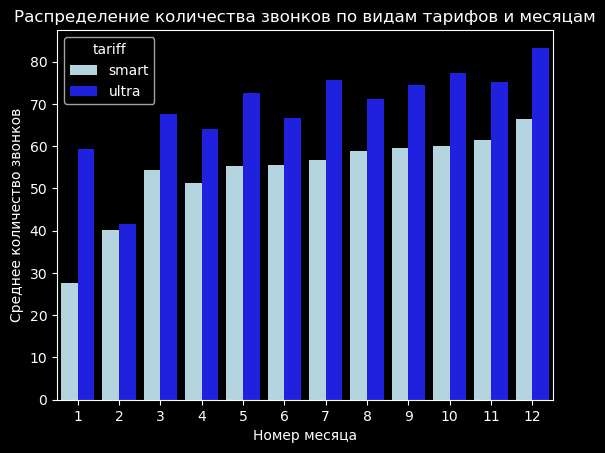

In [47]:
import seaborn as sns

ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

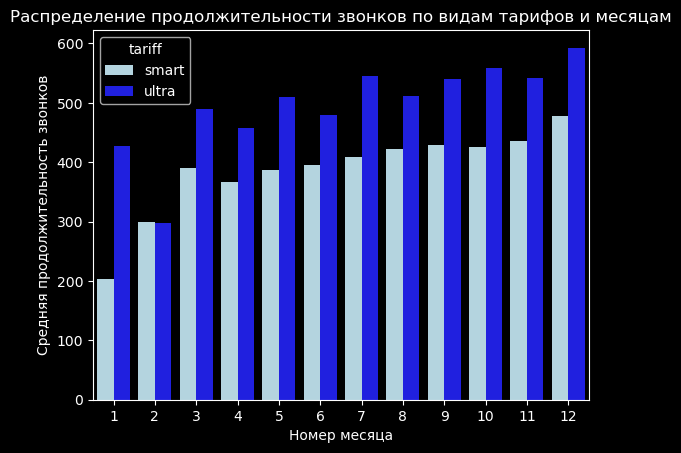

In [48]:
ax = sns.barplot(x='month',
            y='duration_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

Распределение средней продолжительности звонков по видам тарифов и месяцам

Средняя длительность разговоров и  среднее количество звонков у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают данные показатели. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Распределение среднего количества сообщений по видам тарифов и месяцам

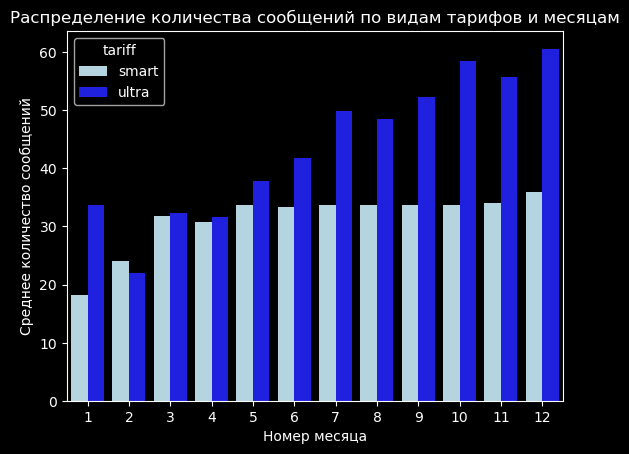

In [49]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

Пользователи тарифа Ultra отправляют больше сообщений, чем пользователи тарифа Smart -  в среднем почти на 20 сообщений больше. Количество сообщений в течение года на обоих тарифах растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров и количеству звонков: в феврале отмечено наименьшее количество сообщений за год.

Распределение среднего значения потраченного трафика по видам тарифов и месяцам

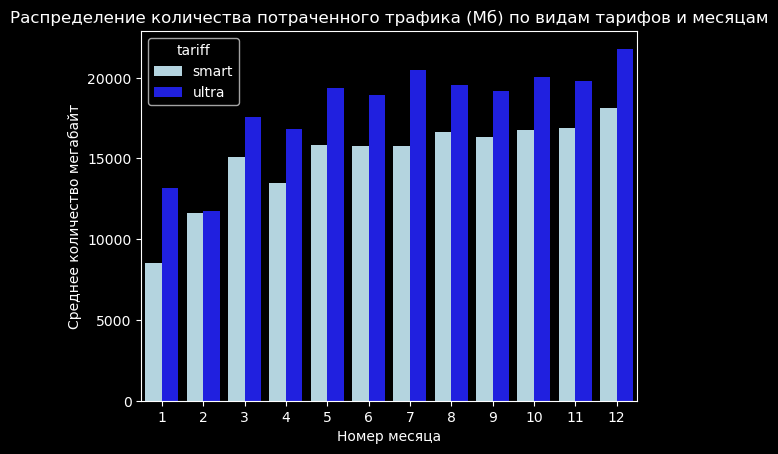

In [50]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

### Проверка гипотез

#### Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются



Нулевая гипотеза: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"<br>
Альтернативная гипотеза: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"<br>
Уровень значимости 0.05

In [51]:
results = (st.ttest_ind(pv_table[pv_table['tariff'] == 'ultra']['total_cost'],
                        pv_table[pv_table['tariff'] == 'smart']['total_cost'],equal_var=False))

alpha = .05 

print(results.pvalue) 

if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

4.2606313931076085e-250
Отвергаем нулевую гипотезу


Нам придется отвергнуть нулевую гипотезу, так как по результатам мы получили значения уровня значимости меньше, чем выбранный нами критерий. Данный результат подтверждает расчет средней выручки по клиенту, проведенный выше.

#### Проверка гипотезы: пользователи из Москвы приносят больше выручки, чем пользователи из других городов


Нулевая гипотеза: : Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы<br>
Альтернативная гипотеза: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы<br>
Уровнь значимости 0.05


In [52]:
results = (st.ttest_ind(pv_table[pv_table['city'] == 'Москва']['total_cost'], 
                        pv_table[pv_table['city'] != 'Москва']['total_cost'],equal_var=False))

alpha = .05 

print(results.pvalue) 
           
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу 


In [53]:
display(pv_table.query('city == "Москва"')['total_cost'].mean())
display(pv_table.query('city != "Москва"')['total_cost'].mean())

1546.7135842880523

1524.9362274298885

В случае отвергнуть нулевую гипотезу не получится, так как по результатам мы получили значения уровня значимости выше, чем выбранный нами критерий. Данный результат подтверждают расчет , проведенные выше.

### Выводы

Более популярным тарифом оказался Смарт.
<br>
<br>

Общая выручка по тарифу Смарт равна 2875351 руб, средняя выручка по клиенту 1290<br>
Общая выручка по тарифу Ультра равна 2039100 руб,средняя  выручка по клиенту 2070 руб 
<br>
<br>

Динамика использования услуг по средним значениям растет в течение годаю При этом, опираясь на среднюю  выручка по клиенту, можно сказать , пользователи на тарифе Ультра реже выходят за рамки своего пакета. Разница между стоимостью тарифа и средней  выручкой по клиенту минимальна. У пользователей на тарифе Смарт обратная ситуация: средняя  выручка по клиенту почти в 2.5 больше стоимости тарифа.
<br>

По графикам распределения видно, что по количеству потраченных минут, сообщений и трафика клиенты обоих тарифов близки друг к другу, но на тарифе Смарт,с учетом доплаты за доппакет, пользовватели будут платить на 40% меньше. Скорее всего поэтому тариф Смарт более популярен.